In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


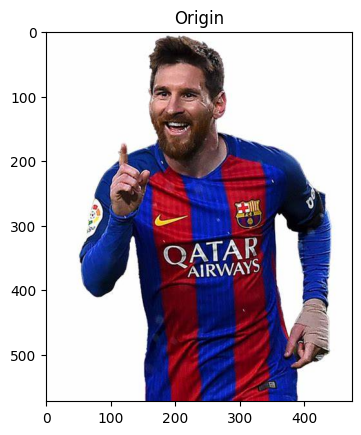

In [3]:
img = cv.imread('../image/OIP.png')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb), plt.title('Origin')
plt.show()


### Điều chỉnh độ sáng

In [19]:
#Cách 1: Viết hàm
def Adjust_brightness(img_rgb, beta):
    adjusted_img = img_rgb.copy()
    #cong gia tri beta vao tat ca cac pixel
    adjusted_img = adjusted_img.astype(np.float32) + beta
    #Gioi han gia tri pixel trong khoang [0, 255](những giá trị nhỏ hơn giá trị min sẽ đc gán = min, giá trị lớn hơn max sẽ đc gán = max)
    adjusted_img = np.clip(adjusted_img, 0, 255)
    adjusted_img = adjusted_img.astype(np.uint8)
    return adjusted_img


In [13]:
 # Tăng độ sáng
brighter_img = Adjust_brightness(img, beta=50)

# Giảm độ sáng
darker_img = Adjust_brightness(img, beta=-50)


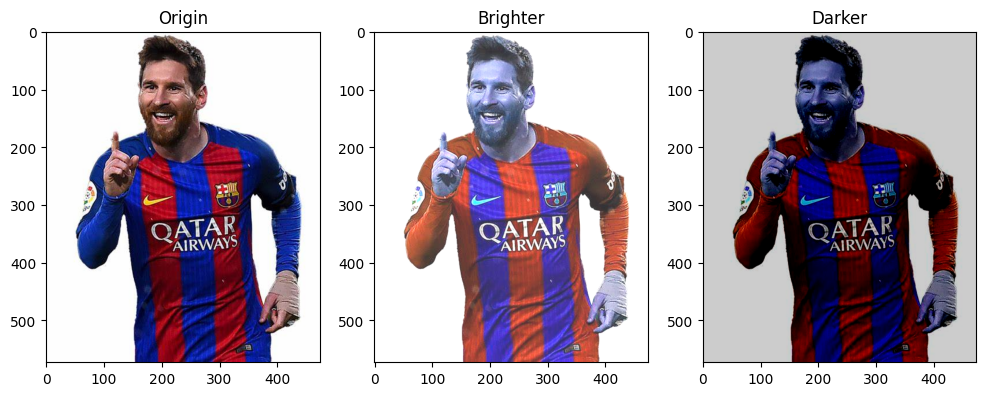

In [ ]:
# Hiển thị kết quả
plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(img_rgb), plt.title('Origin')
plt.subplot(132), plt.imshow(brighter_img, cmap='gray'), plt.title('Brighter')
plt.subplot(133), plt.imshow(darker_img, cmap='gray'), plt.title('Darker')
plt.show() 

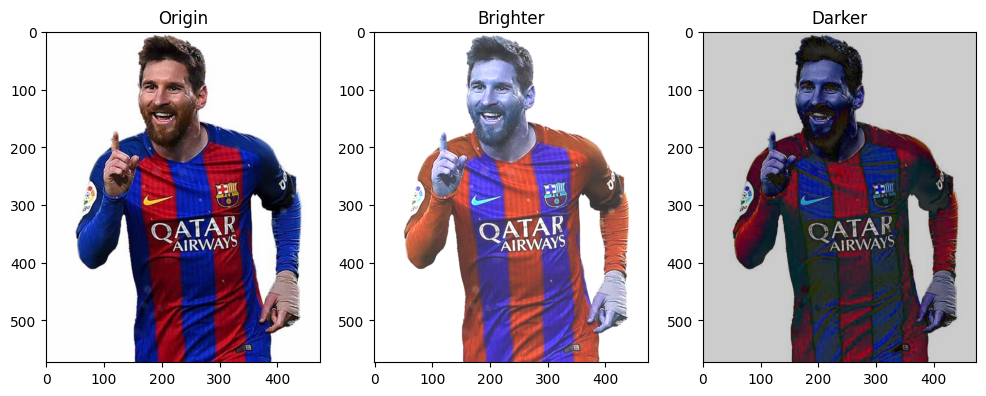

In [11]:
#Cách 2 dùng thư viện
brightness = 50
bright_img = cv.convertScaleAbs(img, alpha=1, beta=brightness)
darker = -50
dark_img = cv.convertScaleAbs(img, alpha=1, beta=darker)

plt.figure(figsize=(12, 8))
plt.subplot(131), plt.imshow(img_rgb), plt.title("Origin")
plt.subplot(132), plt.imshow(bright_img), plt.title("Brighter")
plt.subplot(133), plt.imshow(dark_img), plt.title("Darker")
plt.show()

### Điều chỉnh độ tương phản

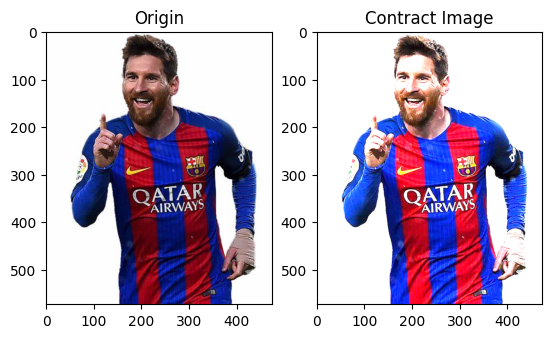

In [ ]:
alpha = 2.0
beta = 0
new_image = np.zeros(img_rgb.shape, img_rgb.dtype)
for y in range(img_rgb.shape[0]):
    for x in range(img_rgb.shape[1]):
        for c in range(img_rgb.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img_rgb[y,x,c] + beta, 0, 255)
plt.subplot(121), plt.imshow(img_rgb), plt.title("Origin")
plt.subplot(122), plt.imshow(new_image), plt.title("Contract Image")
plt.show()

**Nhận xét**
Thời gian chạy lâu: do phải duyệt trên ma trận ảnh

In [20]:
#Cách 1: Viết hàm
def Adjust_contract(img_rgb, alpha, beta):
    adjusted_img = img_rgb.copy()
    #cong gia tri beta vao tat ca cac pixel
    adjusted_img = adjusted_img.astype(np.float32) * alpha + beta
    #Gioi han gia tri pixel trong khoang [0, 255](những giá trị nhỏ hơn giá trị min sẽ đc gán = min, giá trị lớn hơn max sẽ đc gán = max)
    adjusted_img = np.clip(adjusted_img, 0, 255)
    adjusted_img = adjusted_img.astype(np.uint8)
    return adjusted_img


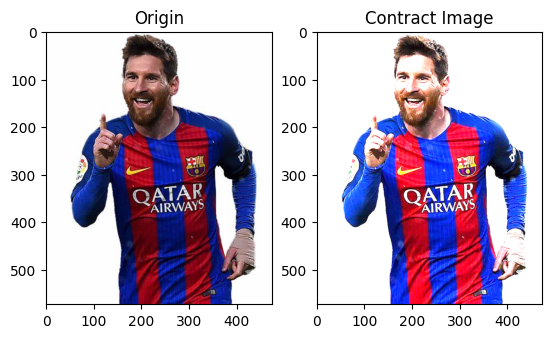

In [22]:
contrast_img_1 = Adjust_contract(img_rgb, alpha=2, beta=0)
plt.subplot(121), plt.imshow(img_rgb), plt.title("Origin")
plt.subplot(122), plt.imshow(contrast_img_1), plt.title("Contract Image")
plt.show()

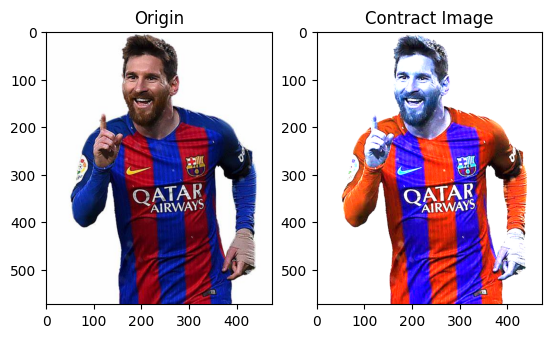

In [21]:
#sử dụng thư viện
alpha = 2.0  # Hệ số điều chỉnh độ tương phản
beta = 0     # Giá trị điều chỉnh độ sáng

# Áp dụng công thức điều chỉnh độ tương phản
contrast_img_2 = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
plt.subplot(121), plt.imshow(img_rgb), plt.title("Origin")
plt.subplot(122), plt.imshow(contrast_img_2), plt.title("Contract Image")
plt.show()

### Gramma Correction
Có thể được sử dụng để điều chỉnh độ sáng của hình ảnh bằng cách sử dụng phép biến đổi phi tuyến tính giữa các giá trị đầu vào và giá trị đầu ra được ánh xạ:


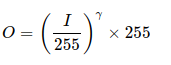

Khi γ<1, các vùng tối ban đầu sẽ sáng hơn và biểu đồ sẽ dịch chuyển sang phải trong khi đó sẽ ngược lại với γ>1.

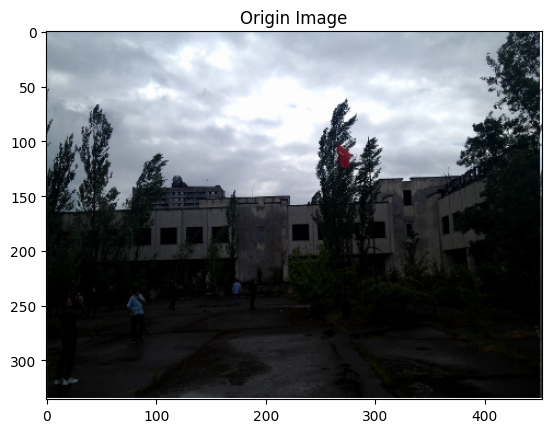

In [26]:
img_2 = cv.imread('/home/vu_ha/Study/ImageProccing/ClassAssignments/image/Basic_Linear_Transform_Tutorial_linear_transform_correction.png')
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

plt.imshow(img_2), plt.title("Origin Image")
plt.show()

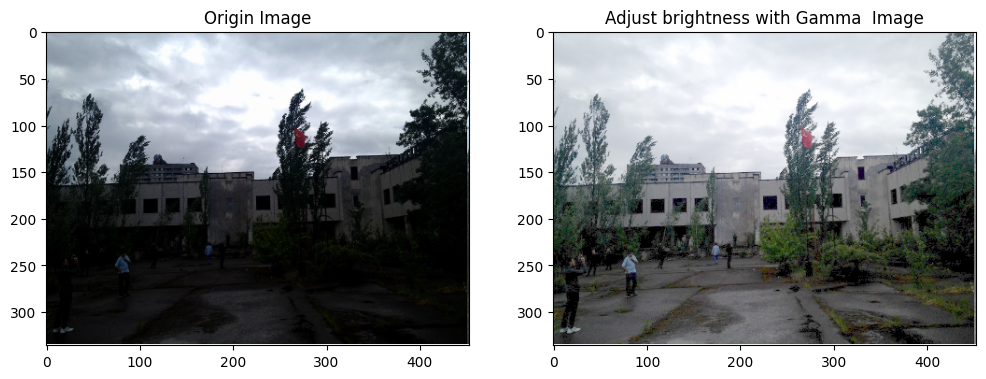

In [ ]:
gamma = 0.4
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(img_2, lookUpTable)# tạo bảng tra cứu các giá trị pixel và thay bằng giá trị lookupTable
plt.figure(figsize=(12, 8))
plt.subplot(121), plt.imshow(img_2), plt.title("Origin Image")
plt.subplot(122), plt.imshow(res), plt.title("Adjust brightness with Gamma  Image")
plt.show()